## Import Library

In [11]:
import cv2
import tensorflow as tf
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Lấy CSDL MNIST

Tải và chuẩn bị dữ liệu:

Dữ liệu MNIST được tải bằng tfds.load.

Dữ liệu huấn luyện và kiểm tra được tách ra thành train_data và eval_data.

Các hình ảnh và nhãn từ train_data và eval_data được chuyển đổi thành các mảng numpy.

Hình ảnh được chuẩn hóa bằng cách chia cho 255.0 để có giá trị trong khoảng [0, 1].

Hình ảnh được định hình lại thành (28, 28, 1) để thêm chiều kênh, phù hợp với đầu vào của mô hình CNN.

In [29]:
# Tải Bộ Dữ liệu MNIST
mnist, info = tfds.load('mnist', with_info=True, as_supervised=True)

# Trích xuất dữ liệu huấn luyện và kiểm tra
train_data = mnist['train']
eval_data = mnist['test']

# Chuẩn bị dữ liệu huấn luyện:
train_data_images = []
train_data_labels = []

for image, label in tfds.as_numpy(train_data):
    train_data_images.append(image)
    train_data_labels.append(label)

train_data_images = np.array(train_data_images)
train_data_labels = np.array(train_data_labels, dtype=np.int32)

# Chuẩn bị dữ liệu kiểm tra (eval):
eval_data_images = []
eval_data_labels = []

for image, label in tfds.as_numpy(eval_data):
    eval_data_images.append(image)
    eval_data_labels.append(label)

eval_data_images = np.array(eval_data_images)
eval_data_labels = np.array(eval_data_labels, dtype=np.int32)

# Chuẩn hóa các hinhf anhr ve khoảng từ 0 -> 1
train_data_images = train_data_images / 255.0
eval_data_images = eval_data_images / 255.0

# Định hình lại hình ảnh:
train_data_images = train_data_images.reshape(-1, 28, 28, 1)
eval_data_images = eval_data_images.reshape(-1, 28, 28, 1)

print("Train data images shape:", train_data_images.shape)
print("Train data labels shape:", train_data_labels.shape)
print("Eval data images shape:", eval_data_images.shape)
print("Eval data labels shape:", eval_data_labels.shape)


Train data images shape: (60000, 28, 28, 1)
Train data labels shape: (60000,)
Eval data images shape: (10000, 28, 28, 1)
Eval data labels shape: (10000,)


# Compile và Fit mô hình, Đánh Giá Mô Hình

Mô hình gồm:
Lớp Conv2D với 32 bộ lọc kích thước (3, 3), hàm kích hoạt 'relu', và đầu vào có kích thước (28, 28, 1).
Lớp MaxPooling2D với kích thước cửa sổ (2, 2).
Lớp Conv2D tiếp theo với 64 bộ lọc kích thước (3, 3), hàm kích hoạt 'relu'.
Lớp MaxPooling2D khác với kích thước cửa sổ (2, 2).
Lớp Conv2D cuối cùng với 64 bộ lọc kích thước (3, 3), hàm kích hoạt 'relu'.
Lớp Flatten để chuyển từ tensor 2D sang vector 1D.
Lớp Dense với 64 đơn vị ẩn và hàm kích hoạt 'relu'.
Lớp Dense cuối cùng với 10 đơn vị đầu ra và hàm kích hoạt 'softmax' để dự đoán xác suất cho 10 lớp (các chữ số từ 0 đến 9).

In [40]:
# Định nghĩa mô hình CNN:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình:
model.fit(train_data_images, train_data_labels, epochs=10)

# Đánh giá mô hình trên dữ liệu kiểm tra:
test_loss, test_acc = model.evaluate(eval_data_images, eval_data_labels)

print(f'Test accuracy: {test_acc}')


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1554 - accuracy: 0.9516
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0396

# Trực quan hóa dự đoán

313/313 [==============================] - 1s 2ms/step


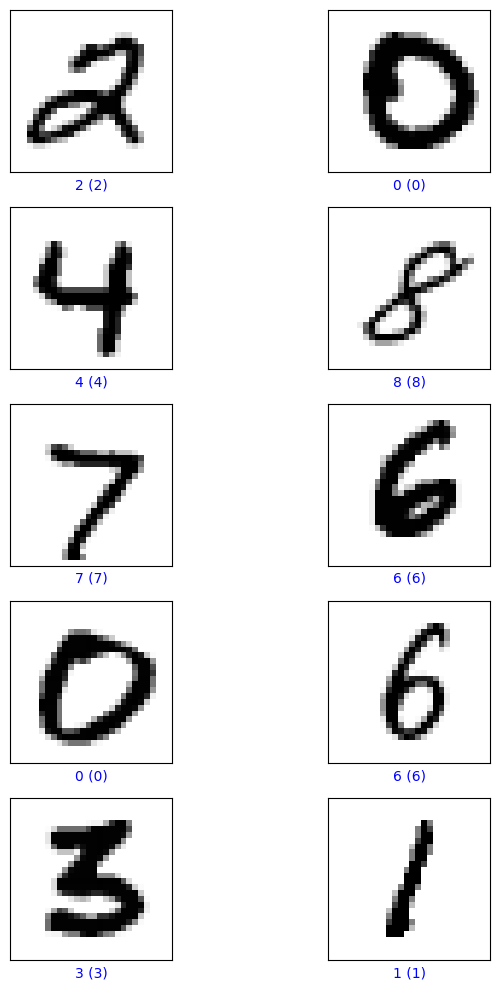

In [41]:
# Dự đoán trên dữ liệu kiểm tra:
predictions = model.predict(eval_data_images)

# Định nghĩa hàm để vẽ hình ảnh với nhãn dự đoán và nhãn thực tế:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

# Vẽ các hình ảnh kiểm tra đầu tiên và nhãn dự đoán:
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, eval_data_labels, eval_data_images)
plt.tight_layout()
plt.show()

## Dữ Liệu: Tự Viết bằng tay

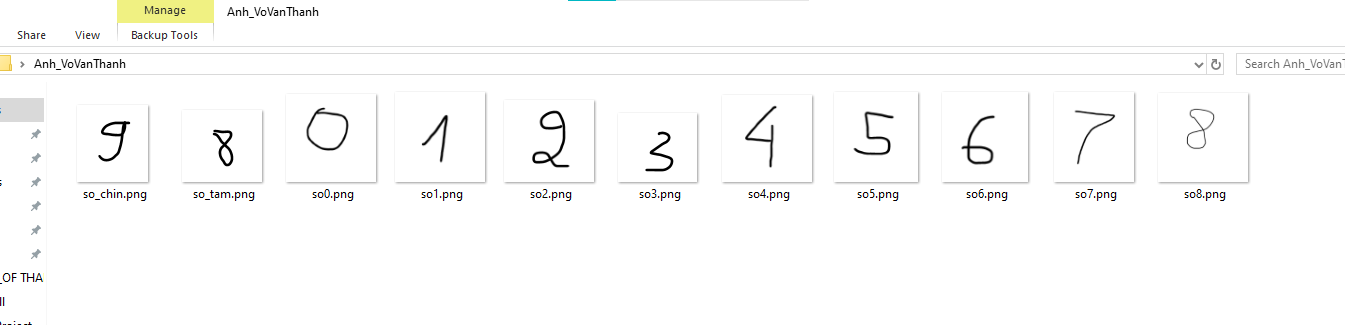

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1/1 [==============================] - 0s 17ms/step


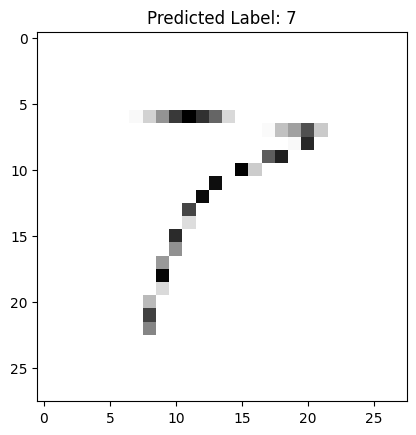

Nhãn dự đoán cho chữ số viết tay là: 7


In [42]:
# Function to preprocess and predict a single handwritten digit image
def predict_handwritten_digit(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))
    # Invert the image (if necessary, to make the background black and digit white)
    img_resized = cv2.bitwise_not(img_resized)
    # Normalize the image
    img_resized = img_resized / 255.0
    # Reshape the image to add batch and channel dimensions
    img_resized = img_resized.reshape(1, 28, 28, 1)

    # Predict the digit
    predictions = model.predict(img_resized)
    predicted_label = np.argmax(predictions)

    # Plot the image and prediction
    plt.imshow(img_resized.reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()

    return predicted_label

# Test the function with an image of handwritten digit
image_path = '/content/gdrive/MyDrive/1.DATA/NhanDienDoiTuong/Anh_VoVanThanh/so7.png'
predicted_label = predict_handwritten_digit(image_path)
print(f'Nhãn dự đoán cho chữ số viết tay là: {predicted_label}')